In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
plt.rcParams.update({'font.size': 22})

In [2]:
def moving_average(data, window_size, nodata_threshold, cumulative_option):
    moving_averaged_data = []
    for i in range (0, int(data.shape[0] / window_size)):
        x = data[i * window_size: (i + 1) * window_size]
        x = x[x > nodata_threshold]
        if cumulative_option:
            x = x * window_size
        moving_averaged_data.append([np.percentile(x, 90), np.mean(x), np.percentile(x, 10)])
    moving_averaged_data = np.asanyarray(moving_averaged_data)
    return moving_averaged_data


def season_average(data, cumulative_option):
    monthly_mean = np.zeros(12)
    count = np.zeros(12)
    for i in range (0, data.shape[0]):
        month = min(int(i % 365 / 30), 11)
        monthly_mean[month] += data[i]
        count[month] += 1.
    monthly_mean = monthly_mean / count
    if cumulative_option:
        monthly_mean = monthly_mean * 30.
    return monthly_mean

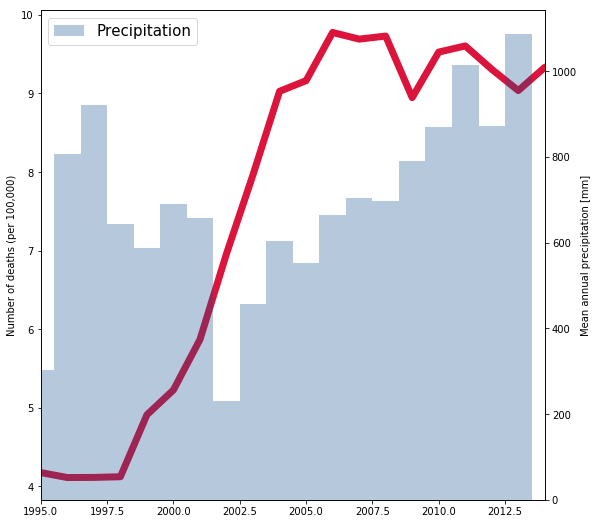

In [6]:
data_types = ['Precipitation']

cumulative_options = [True]
y_labels = ['Temperature [C]', 'Temperature [C]', 'Precipitation [mm]',
              'Wind [m/s]', 'Relative Humidity [%]', 'Solar [MJ/m^2]']

data_dir = 'Data\\81263_2018-10-28-16-29-48\\'

for data_type_index in range(0, len(data_types)):
    count = None
    for file_name in os.listdir(data_dir):
        if '.csv' in file_name:
            station_name = file_name.replace('weatherdata-', '').replace('.csv', '')
            data_type = data_types[data_type_index]

            data_path = data_dir + 'weatherdata-' + station_name + '.csv'
            data_df = pd.read_csv(data_path, index_col=False, low_memory=False)

            if count is None:
                time_series = np.array(data_df[data_type])
                count = np.ones_like(time_series)
            else:
                time_series += np.array(data_df[data_type])
                count += 1.


data_file = 'Data\\malaria-death-rates-by-age.csv'
df_malaria = pd.read_csv(data_file)
df_malaria = df_malaria.loc[df_malaria['Code'] == 'ZWE']

fig, ax1 = plt.subplots()
p1 = ax1.plot(df_malaria['Year'], df_malaria['All ages (per 100,000)'], lw = 7, color = '#DC143C',
              label="Number of death")
ax1.set_ylabel('Number of deaths (per 100,000)')

time_series = time_series / count
yearly_time_series = moving_average(data=time_series, window_size=365, nodata_threshold=-100,
                                    cumulative_option=cumulative_options[data_type_index])


width = 1
ind = np.arange(1979, 2014)
ax2 = ax1.twinx()
p2 = ax2.bar(ind, yearly_time_series[:, 1], width, color= '#104E8B', linewidth=0, alpha=0.3, label="Precipitation")
ax2.set_ylabel('Mean annual precipitation [mm]')

plt.xlim([1995, 2014])
plt.xlabel('Year')

plt.legend(fontsize=15, loc = 'upper left')

plt.gcf().subplots_adjust(bottom=0.2, left= 0.15, right = 0.85)
fig.set_size_inches((10,10))
plt.savefig('Zimb.png', format='png', dpi=500)

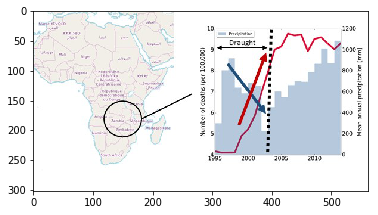

In [5]:
import matplotlib.image as mpimg
img=mpimg.imread('TDI_2.jpg')
plt.imshow(img)